**عنوان و هدف پروژه**

<p dir=rtl>
هدف از انجام این پروژه آشنایی با الگوریتم ژنتیک و استفاده از آن در حل مسله است که میتوان گفت در اینجا ما با یک Constrain Satisfaction Problem روبه رو هستیم.
</p>

**توضیح کلی پروژه و تعریف صورت مسئله**


<p dir=rtl>
در این پروژه ما باید از الگوریتم ژنتیک برای حل مسئله ای استفاده کنیم که جواب آن باید سه شرط را همزمان ارضا کند پس همانطور که گفتم با یک Constrain Satisfaction Problem رو به رو هستیم.حال با استفاده از مفهوم الگوریتم ژنتیک و همانطوری که در طبیعت وجود دارد ما در ابتدا یک پاسخ تصادفی که ممکن است محدودیت ها را ارضا نکند شروع میکنیم و سعی می کنیم آن را به سمت بهتر شدن پیش ببریم تا در نهایت به یک پاسخ درست برای مسئله برسیم.
</p>

**دیتا های لود شده**


<p dir=rtl>
در این قسمت ما از داده های موجود در فایل snacks.csv استفاده کردیم که در آن تعدادی میان وعده با اطلاعاتی درباره مقدار موجود و ارزش غذایی آن مقادیر وجود دارد.
</p>

In [1]:
#analysing data from file
import pandas as pd

df = pd.read_csv("snacks.csv")
row_list = df.values.tolist()

snack_names = df.iloc[:,0]
num_of_snacks = len(row_list)

dict_info = dict()
for i in range(0, len(row_list)):
  dict_info[i] = row_list[i][1:]

print(df)

            Snack  Available Weight  Value
0          MazMaz                10     10
1   Doogh-e-Abali                15     10
2            Nani                 5      5
3            Jooj                 7     15
4         Hot-Dog                20     15
5           Chips                 8      6
6        Nooshaba                12      8
7        Shokolat                 6      7
8       Chocoroll                 9     12
9         Cookies                11     11
10        Abnabat                 4      4
11   Adams-Khersi                14      9
12        Popcorn                16     13
13         Pastil                 3      7
14       Tordilla                10      9
15       Masghati                 5      6
16        Ghottab                 7     10
17   Saghe-Talaei                 9     11
18    Choob-Shoor                13     12


<p dir=rtl>
در این قسمت محدودیت هایی که در مسئله وجود دارد توسط کاربر وارد می شود تا با
توجه به آنها شروع به حل کردن مسئله کنیم. در واقع به ترتیب حداکثر وزن غذاها، حداقل ارزش غذایی آنها و بازه تنوع غذاهایی که باید در کوله پشتی قرار بگیرند از کاربر دریافت می شود.
</p>

In [2]:
#getting input
print("please enter the requested information in order:\n1)Max-weight\n2)Min-value\n3)Number of types of snacks(low, high)")
Max_weight, Min_value, min_type, max_type,  = map(int, input().split())

please enter the requested information in order:
1)Max-weight
2)Min-value
3)Number of types of snacks(low, high)
12 10 2 7


<p dir=rtl>
این قسمت بخش اصلی پروژه است که در ابتدا کلیت الگوریتم را توضیح می دهم و سپس به
بررسی جزییات و خروجی توابع می پردازم.
</p>


<p dir=rtl>
در الگوریتم ژنتیک در ابتدا ما باید یک کروموزوم که از تعدادی ژن تشکیل شده بسازیم و آنرا رو به بهتر شدن حرکت دهیم. در این مسئله من یک کروموزوم را تشکیل شده از 19 ژن فرض کردم که هر ژن اطلاعات مربوط به وزن و ارزش غذایی یک مدل غذا را در کوله پشتی مدل می کند.
</p>


<p dir=rtl>
در وااقع می توان گفت کروموزوم تعریف شده در این الگوریتم اندازه ای ثابت و برابر تعداد میان وعده های موجود در فایل اولیه دارد. باید اشاره کنم دیدگاه دیگری نیز وجود دارد و آن این است که هربار تعداد ژن های یک کروموزوم را برابر حداکثر تنوع مجاز میان  وعده های موجود در فایل اولیه در نظر بگیریم ولی در این الگوریتمی که من در نظر گرفتم تعریف crossover و همچنین می توان گفت mutation راحت تر و به نظرم به طبیعت نزدیک تر هست.
</p>


<p dir=rtl>
در یک دید کلی، سلسه اتفاقاتی که در اینجا می افتد این است که ما یک جمعیت اولیه که از تعدادی کروموزوم تشکیل شده به صورت رندوم و با توجه به اطلاعات موجود در فایل اولیه ایجاد می کنیم.سپس fitness هر کروموزوم را محاسبه میکنیم و با توجه به امتیاز های محاسبه شده برای هر کروموزوم، به آنها یک احتمال برای انتخاب شدن نسبت می دهیم.پس  از آن با توجه به آن احتمالات، به همان تعداد کروموزومی که در جمعیتمان هست، کروکوزوم از آنها به صورت انتخاب با جایگذاری انتخاب می کنیم.
</p>


<p dir=rtl>
مرحله بعدی مرحله ی crossover است که من در اینجا از مدل n_point crossover استفاده کردم. باتوجه به تعریفی که از کروموزوم هایم داشتم در این مرحله بعد از اینکه جمعیت جدید را انتخاب کردم، آنها را shuffle میکنم و روی هر دو کروموزوم با یک احتمالی crossover انجام می دهم.
</p>


<p dir=rtl>
مرحله بعدی مرحله ی mutation است که برای هر کروموزوم انجام می شود. سازوکار در اینجا بدین صورت است که با یک احتمالی روی یک کروموزوم mutation انجام می شود که در صورت انجام شدن با یک احتمالی وزن یک میان وعده خاص 0 می شود یا یک مقدار رندوم از وزنی که در فایل برای آن غذا ذکر شده انتخاب می شود و update می شود.
</p>


In [26]:
from pickle import POP
import random as rd
import numpy as np
import math
POP_SIZE = 50
CROSS_POINT = 5
CUTOFF_POINT = 20
MUTATION_PROB = 0.2
TO_ZERO_PROB = 0.6
CROSS_PROB = 0.6

global_points = []

def generate_slicing_points(num_slices):
  slice_points = set()
  while len(slice_points) < 6:
    number = rd.randint(1, num_of_snacks + 1)
    slice_points.add(number)
  slice_points = list(slice_points)
  return slice_points

def make_random_weight(limit):
    choice = rd.choice(['int', 'float'])
    if choice == 'int':
      return rd.randint(0, limit)
    return rd.uniform(0, limit)

def calculate_probabilities(numbers):
    sum_of_points = 0
    normalized_probabilities = []
    for item in numbers:
      sum_of_points += item
    if sum_of_points == 0.0:
      for item in range(0, len(numbers)):
        normalized_probabilities.append(1)
      return normalized_probabilities
    else:
      for item in numbers:
        temp_prob = 1 - (item / sum_of_points)
        normalized_probabilities.append(temp_prob)
      return normalized_probabilities

def check_correctness(obj):
  state = False
  for chromozome in obj:
    weights = 0
    values = 0
    tedad = 0
    for item in chromozome:
      weights += item[0]
      values += item[1]
      if int(item[0]) != 0:
        tedad +=1
    if (weights <= Max_weight) and (values >= Min_value) and (tedad >= min_type) and (tedad <= max_type):
      state = True
      return state
  return state

def correct_answers(last_population):
  answers = []
  for chromozome in last_population:
    weights = 0
    values = 0
    tedad = 0
    for gene in chromozome:
      weights += gene[0]
      values += gene[1]
      if int(gene[0]) != 0:
        tedad +=1
    if (weights <= Max_weight) and (values >= Min_value) and (tedad >= min_type) and (tedad <= max_type):
      answers.append(chromozome)
  return answers

def show_output(answers):
  for i in range(0, len(answers)):
    tedad = 0
    for j in range(0, num_of_snacks):
      if answers[i][j][0] != 0.0:
        print(snack_names[j], ': ', answers[i][j][0])
      if answers[i][j][0] == 0.0:
        tedad += 1
    total_weight = sum(info[0] for info in answers[i])
    total_value = sum(info[1] for info in answers[i])

    print('Total Weight: ', total_weight)
    print('Total Value: ', total_value)
    print('********************************************************')

def delete_duplicated_answers(answ):
  unique_answers = dict()
  for item in answ:
    if item not in unique_answers:
      unique_answers[item] = 0
    else:
      unique_answers[item] += 1
  return unique_answers.keys()

#defining Chromosome and gene
class Population:
  def __init__(self):
    self.population = list() #each internal list is a gene
    self.points = []

  def make_random_population(self):
    for j in range(0, POP_SIZE):
      temp_chrom = [(0, 0)] * num_of_snacks
      for i in range (0, num_of_snacks):
        temp_weight = make_random_weight(dict_info[i][0])
        temp_value = (temp_weight / dict_info[i][0]) * dict_info[i][1] #according to weight ratio
        temp_chrom[i] = [float(temp_weight), float(temp_value)]

      self.population.append(temp_chrom)

  def calculate_the_fitness_of_a_chromozome(self, chrom):
    sum_of_weights = 0
    sum_of_values = 0
    num_zero = 0
    for gene in chrom:
      sum_of_weights += gene[0]
      sum_of_values += gene[1]
      if int(gene[0] == 0):
        num_zero += 1
    variety = num_of_snacks - num_zero

    point = 0
    if variety > max_type:
      point += (variety - max_type) + 200
    elif variety < min_type:
      point += (min_type - variety) + 200

    if sum_of_weights > Max_weight:
      point += (sum_of_weights - Max_weight) + 100

    if sum_of_values < Min_value:
      point = (Min_value - sum_of_values) + 100

    return [chrom, point]

  def set_rank_of_genes_of_a_population(self):
    tmp_population = []
    for chrom in self.population:
      tmp_population.append(self.calculate_the_fitness_of_a_chromozome(chrom))
    self.population = []
    self.population = tmp_population

    points = []
    for chrom, point in self.population:
      points.append(point)
    self.points = points
    new_probabilities = calculate_probabilities(points)
    for i in range(0, len(self.population)):
      self.population[i][1] = new_probabilities[i]

  def select(self):
    selected_chromozoms = []
    chromozoms =[]
    probs = []
    for i in range(0, len(self.population)):
      chromozoms.append(self.population[i][0])
      probs.append(self.population[i][1])
    # Weighted random sampling
    selected_chromozoms = rd.choices(chromozoms, weights=probs, k=POP_SIZE)
    rd.shuffle(selected_chromozoms)
    self.population = selected_chromozoms

  #in this version i made a random probability for doing crossover
  def handling_crossover(self):
    new_population = []
    for i in range(0, POP_SIZE, 2):
      random_prob = rd.random()
      if random_prob < CROSS_PROB:
        new_population.append(self.population[i])
        new_population.append(self.population[i + 1])
      else:
        num_slices = rd.randint(1, num_of_snacks - 1)
        slicing_points = generate_slicing_points(num_slices)
        new_chrom1, new_chrom2 = self.n_point_cross_over(slicing_points, self.population[i], self.population[i + 1])

        new_population.append(new_chrom1)
        new_population.append(new_chrom2)

    self.population = new_population

  def n_point_cross_over(self, cross_points, par1, par2):
    child1 = []
    child2 = []
    last_point = 0
    for point in cross_points:
      if (cross_points.index(point) + 1) % 2 == 0:
        child1 += par1[last_point:point]
        child2 += par2[last_point:point]
      else:
        child1 += par2[last_point:point]
        child2 += par1[last_point:point]
      last_point = point

    child1 += par1[last_point:]
    child2 += par2[last_point:]

    return child1, child2

  def mutation_on_population(self):
    for i in range(0, POP_SIZE):
      self.population[i] = self.mutation_on_chromozome(self.population[i])

  def mutation_on_chromozome(self, chromozome):
    for i in range(0, len(chromozome)):
      p1 = rd.random()
      if p1 <= MUTATION_PROB:
        p2 = rd.random()
        if p2 <= TO_ZERO_PROB:
          chromozome[i][0] = 0.0
          chromozome[i][1] = 0.0
        else:
          chromozome[i][0] = make_random_weight(dict_info[i][0])
          chromozome[i][1] = (chromozome[i][0] / dict_info[i][0]) * dict_info[i][1]
      else:
        pass
    return chromozome

  def check_end_condition(self):
    sum_points_of_population = 0
    for point in self.points:
      sum_points_of_population += point
    average_points_of_population = sum_points_of_population / POP_SIZE
    global_points.append(average_points_of_population)
    if (average_points_of_population <= CUTOFF_POINT):
      return True
    return False










def main():
  a = Population()
  a.make_random_population()
  state = False
  answ = []
  num_of_iterations = 0
  while(not state):
    num_of_iterations += 1
    a.set_rank_of_genes_of_a_population()
    state = a.check_end_condition()
    a.select()
    if(not state):
      a.handling_crossover()
      a.mutation_on_population()
    else:
      break
  # answ = a.population
  answ = correct_answers(a.population)
  show_output(answ)
  print('Number of iterations = ', num_of_iterations)
  print('Number of chromozomes that satisfy limitations of the problem = ', len(answ))

main()

Nani :  0.4647831839757449
Jooj :  3.2182921982195136
Shokolat :  2
Cookies :  1.3615406583931624
Ghottab :  3.8938775631463916
Total Weight:  10.938493603734813
Total Value:  16.618679833524613
********************************************************
Nani :  0.4647831839757449
Jooj :  3.2182921982195136
Shokolat :  2
Cookies :  1.3615406583931624
Ghottab :  3.8938775631463916
Total Weight:  10.938493603734813
Total Value:  16.618679833524613
********************************************************
Nani :  0.4647831839757449
Jooj :  3.2182921982195136
Shokolat :  2
Cookies :  1.3615406583931624
Ghottab :  3.8938775631463916
Total Weight:  10.938493603734813
Total Value:  16.618679833524613
********************************************************
Nani :  0.4647831839757449
Jooj :  3.2182921982195136
Shokolat :  2
Cookies :  1.3615406583931624
Ghottab :  3.8938775631463916
Total Weight:  10.938493603734813
Total Value:  16.618679833524613
*************************************************

<p dir=rtl>
بخش اصلی پیاده سازی در کلاس population اتفاق میافتد که در قسمت ذیل بطور خلاصه توابع آن آورده شده است.
</p>

```
class Population:
  def __init__(self):
    self.population = list() #each internal list is a gene
    self.points = []

  def make_random_population(self)
  def calculate_the_fitness_of_a_chromozome(self, chrom)
  def set_rank_of_genes_of_a_population(self)
  def select(self)
  def handling_crossover(self)
  def n_point_cross_over(self, cross_points, par1, par2)
  def show_output(self)
  def mutation_on_population(self)
  def mutation_on_chromozome(self, chromozome)
  def check_end_condition(self)
```
**attributes of class**
<p dir=rtl>
چیز هایی که در یک object از این کلاس نگهداری می شود جمعیت یا نسلی است که در هر لحظه داریم با آن کار میکنیم و همچنین امتیاز های کروموزوم های آن جمعیت که به ترتیب با عناوین sel.population و self.points آمده است.
</p>

<p dir=rtl>
  1)همانطور که گفتم در ابتدا یک جمعیت اولیه از کروموزوم ها ایجاد می شود که اطلاعات هر میان وعده در آن به صورت رندوم با توجه به داده های لود شده تعیین می شود.
  تابع زیر برای آن تعریف شده که به اندازه جمعیت که با hyperparameter POP_SIZE مشخص می شود، کروموزوم ایجاد می کند و آنرا به self.population اضافه می کند و در پایان اجرای این تابع، یک جمعیت اولیه در متغیر کلاسمان داریم.
</p>


```
  def make_random_population(self):
    for j in range(0, POP_SIZE):
      temp_chrom = [(0, 0)] * num_of_snacks
      for i in range (0, num_of_snacks):
        temp_weight = make_random_weight(dict_info[i][0])
        temp_value = (temp_weight / dict_info[i][0]) * dict_info[i][1] #according to weight ratio
        temp_chrom[i] = [float(temp_weight), float(temp_value)]

      self.population.append(temp_chrom)
```
<p dir=rtl>
2) پس از آن مرحله ی محاسبه ی fitness هر کروموزوم و نسبت دادن یک احتمال برای انتخاب به هر کروموزوم می باشد که از توابع زیر برای این بخش استفاده شده است. در تابع set_rank روی جمعیت موجود در object یک حلقه اجرا می شود که هر کروموزوم را میگیرد و به تابع calculate_fitness میفرستد که آن تابع با توجه به مجموع وزن غذاها، مجموع ارزش غذایی آن ها و تنوع غذاها یک امتیازی را به هر کروموزوم نسبت می دهد و دوتایی کروموزوم و امتیازش را به تابع قبلی برمی گرداند.پس از اجرای حلقه روی تمام کروموزوم ها جمعیت اولیه update می شود که علاوه بر هر کروموزوم، امتیاز آنرا نیز داشته باشد.
</p>

<p dir=rtl>
در انتهای تابع set_rank امیتازات کروموزم های موجود در جمعیت که در self.points ذخیره شده به تابع calculate_probabilities داده می شود که با توجه به امتیازات،  احتمال انتخاب را برای هر کروموزوم محاسبه می کند و به صورت یک لیست به تابع set_rank بر میگرداند.سپس روی جمعیت یک حلقه اجرا می شود و به گونه ای update می شود که به جای اینکه تنها کروموزوم ها  را نگه دارد، دوتایی کروموزوم و احتمالش را نگه دارد.
</p>

<p dir=rtl>
نکته ای که در این قسمت باید به آن اشاره کنم این است که کروموزومی که شرایط مسئله را ارضا امتیاز 0 دارد پس هر چه از شرایط مسئله منحرف شود امتیاز بیشتری به صورت مثبت میگیرد ولی در واقع هر چه امتیاز یک کروکوزوم کمتر باشد به درست بودن نزدیک تر است. حال این امتیاز دهی به این صورت است که اگر وزن یک کروموزوم از max مجاز بیشتر باشد اختلاف ایندو بعلاوه مقدار ثابت 100 به امتیاز اضافه میشود همچنین اگر مجموع ارزش یک کروموزوم از min مجاز کمتر باشد این اختلاف به علاوه یک مقدار ثابت 100 امتیاز اضافه میشود و برای تنوع غذاها نیز اگر در بازه مشخص شده قرار نگیرد یک مقدار ثابت که در اینجا 200 فرض شده بعلاوه انحراف از محدوده به امتیاز اضافه می شود. دلیل این عدد بزرگ این است که مدل تعریف من از کروموزوم باعث می شود من در ابتدای ایجاد جمعیت اولیه شرط تنوع غذاها را رعایت نکنم پس عدد را بزرگ در نظر گرفتم تا در هر مرحله ایجاد نسل جدید، توجه ویژه ای به موضوع تنوع شود و اختلاف امتیاز کروموزومی که تنوع را رعایت می کند با کروموزومی که این محدودیت را زیرپا میگذارد قابل توجه شود.
نکته دیگر این است اختلاف وزن و ارزش میتواند به توان 2 یا 3 برسد که کمی مقیاس سنجش دقیقتر شود و فاصله امتیازات از هم بیشتر شود تا سرعت رسیدن به یک جمعیت قابل قبول بیشتر شود که آن را نیز تست کردم و تاثیر مثبتش مشاهده شد.
</p>

```
def set_rank_of_genes_of_a_population(self):
    tmp_population = []
    for chrom in self.population:
      tmp_population.append(self.calculate_the_fitness_of_a_chromozome(chrom))
    self.population = []
    self.population = tmp_population

    points = []
    for chrom, point in self.population:
      points.append(point)
    self.points = points
    new_probabilities = calculate_probabilities(points)
    for i in range(0, len(self.population)):
      self.population[i][1] = new_probabilities[i]
def calculate_the_fitness_of_a_chromozome(self, chrom):
  sum_of_weights = 0
    sum_of_values = 0
    num_zero = 0
    for gene in chrom:
      sum_of_weights += gene[0]
      sum_of_values += gene[1]
      if int(gene[0] == 0):
        num_zero += 1
    variety = num_of_snacks - num_zero

    point = 0
    if variety > max_type:
      point += (variety - max_type) + 1000
    elif variety < min_type:
      point += (min_type - variety) + 1000

    if sum_of_weights > Max_weight:
      point += (sum_of_weights - Max_weight)

    if sum_of_values < Min_value:
      point = (Min_value - sum_of_values)

    return [chrom, point]
def calculate_probabilities(numbers):
    min_value = min(numbers)
    max_value = max(numbers)

    # Define a scaling factor to limit the range of probabilities
    scaling_factor = 2.0
    # Calculate probabilities using scaled exponential function
    probabilities = [np.exp(-abs(x) / scaling_factor) for x in numbers]
    # Normalize probabilities
    total_probability = sum(probabilities)
    normalized_probabilities = [p / total_probability for p in probabilities]

    return normalized_probabilities
```


<p dir=rtl>
3) مرحله ی بعدی مرحله ی انتخاب با جایگذاری از جمعیت با توجه به احتمالات محاسبه شده در مرحله ی قبلی است که برای این قسمت از تابع  select استفاده شده که در زیر آمده است. کاری که این تابع میکند این است که کروموزوم ها و احتمالات آنها را در دو لیست جدا میریزد و سپس از عناصر موجود در لیست کروموزوم ها متناسب با وزن هر کروموزوم که در لیست احتمالات ذخیره شده به وسیله تابع random.choices به تعداد جمعیت(POP_SIZE) کروموزوم انتخاب می کند و آنها را shuffle می کند و سپس self.population را با همین selected_chromozomes آپدیت می کند و مقادیر قبلی را حذف می کند.
</p>


```
def select(self):
    selected_chromozoms = []
    chromozoms =[]
    probs = []
    for i in range(0, len(self.population)):
      chromozoms.append(self.population[i][0])
      probs.append(self.population[i][1])
    # Weighted random sampling
    selected_chromozoms = rd.choices(chromozoms, weights=probs, k=POP_SIZE)
    rd.shuffle(selected_chromozoms)
    self.population = selected_chromozoms
```

<p dir=rtl>
4) مرحله ی بعدی مرحله crossover است که برای این کار از تابع handling_crossover  استفاده می شود که در زیر آمده است. در این تابع برای هر دو زوج کروموزوم که پشت سر هم هستند یک مقدار رندوم ایجاد می شود که اگر از CROSS_PROB کمتر بود یعنی برای ایندو CROSSOVER انجام نمی شود و هر دو بدون تغییر به new_population اضافه میشوند و در غیر این صورت تعداد قسمت هایی از یک کروموزوم که باید slice شود توسط یک عدد رندوم مشخص می شود و آن نقاط توسط تابع slicing_points مشخص می شوند،سپس دو کروموزوم مفروض به همراه این نقاط به تابع n_point_cross_over داده می شوند. این تابع جای ژن های بین هر دو نقطه در slicing_points  را در دو کروموزوم  با هم عوض میکند تا دو کروموزوم جدید ایجاد شود، سپس این دو کروموزوم جدید را بعنوان خروجی به تابع handling_cross_over می  فرستد تا آن تابع این دو کروموزوم جدید را بجای دو کروموزوم والد در self.population قرار دهد.در انتهای این تابع، self.population بطور کلی تغییر کرده که برخی کروموزوم ها از قبل مستقیما به آن آمده اند و برخی پس از اعمال crossover به آن اضافه شده اند.
</p>

```
def handling_crossover(self):
    new_population = []
    for i in range(0, POP_SIZE, 2):
      random_prob = rd.random()
      if random_prob < CROSS_PROB:
        new_population.append(self.population[i])
        new_population.append(self.population[i + 1])
      else:
        num_slices = rd.randint(1, num_of_snacks - 1)
        slicing_points = generate_slicing_points(num_slices)
        new_chrom1, new_chrom2 = self.n_point_cross_over(slicing_points, self.population[i], self.population[i + 1])

        new_population.append(new_chrom1)
        new_population.append(new_chrom2)

    self.population = new_population

  def n_point_cross_over(self, cross_points, par1, par2):
    child1 = []
    child2 = []
    last_point = 0
    for point in cross_points:
      if (cross_points.index(point) + 1) % 2 == 0:
        child1 += par1[last_point:point]
        child2 += par2[last_point:point]
      else:
        child1 += par2[last_point:point]
        child2 += par1[last_point:point]
      last_point = point

    child1 += par1[last_point:]
    child2 += par2[last_point:]

    return child1, child2
```

<p dir=rtl>
5) مرحله بعدی مرحله mutation است. این مرحله با توجه به الگوریتم من و تعریف من از یک کروموزوم که طول آن ثابت است و در ابتدا به محدودیت تنوع توجهی نمی کند یک مرحله اساسی و حیاتی است. بطوریکه قبل از تعریف آن و اعمال آن به داده ها، پس از iteration های طولانی احتمال وجود پاسخ درست در جمعیت نهایی ام خیلی پایین بود چون اگر در جمعیت اولیه کروموزومی که محدودیت تنوع را ارضا کند ایجاد نمیشد پاسخ درستی نداشتیم و تا قبل از این مرحله جواب ها به کم وزن ترین کروموزوم میل پیدا می کردند و پس از مدتی دیگر رو به بهبودی نمیرفتند و در یک مرحله ثابتی باقی میماندند و هیچ تغییری در آنها ایجاد نمی شد.
</p>

<p dir=rtl>
برای این قسمت از تابع mutation_on_population استفاده کردم.این تابع روی جمعیت موجود در object ایجاد شده از کلاس population، یک حلقه اجرا می کند و هر کروموزوم را به تابع mutation_on_chromozome می فرستد. در آن تابع یک عدد رندوم بین 0 و 1 انتخاب می شود و با توجه به متغیر MUTATION_PROB یا mutation اتفاق میافتد و یا نه.اگر mutation اتفاق نیفتد، این تابع همان کروموزوم را بدون تغییر به تابع mutation_on_population برمیگرداند ولی اگر mutaion انجام شود یک حلقه روی ژن های آن کروموزوم میزنیم و یک عدد رندوم بین 0 و 1 ایجاد میکنیم، اگر از مقدار TO_ZERO_PROB بیشتر شد یک مقدار رندوم برای وزن از دیتای لود شده برای غذای مورد نظر حساب میکنیم و ارزش را نیز به نسبت وزن مشخص میکنیم در غیر اینصورت مقدار وزن و ارزش غذای مورد نظر را 0 میکنیم و در نهایت پس از پایان حلقه، کروموزوم جدید را به تابع mutation_on_population میفرستیم. آن تابع مقادیر جدید را update میکند و پس از پایان اجرای آن تابع، self.population بطور کامل آپدیت شده که یکسری از کروکوزوم که بدون تغییر مانده اند و یکسری جهش داشته اند و همین جهش است که باعث می شود اگر به یک روند ثابت رسیدیم بتوانیم از آن خارج شویم به امید آنکه با این سرپیچی لحظه ای، به جواب درست نزدیک شویم و از گودال های محلی رهایی پیدا کنیم.  
</p>

<p dir=rtl>
رویکرد بهتری که برای mutation وجود دارد این است که هر چه جلوتر می رویم احتمال mutation را کمتر کنیم.چون انتظار می رود هر چه جلوتر رفتیم نیاز به منحرف شدن لحظه نداشته باشیم و چه بسا احتمال صفر کردن هر چه جلوتر میرویم منطقی به نظر میرسد که کمتر شود.ولی من از این روش استفاده نکردم و دو مقدار ثابت MUTATION_PROB و TO_ZERO_PROB را بصورت hyperparameter تعریف کردم. البته میتوانستم از یک رویکرد دیگر هم استفاده کنم و آن این بود که در صورت اتفاق افتادن mutaion تنها بصورت رندوم با توجه به دیتای لود شده برای هر غذا مقدار جدید ایجاد کنم که در آن صورت هم 0 ممکن بود انتخاب شود ولی چون من در ابتدا محدودیت تنوع را در نظر نمیگیرم بیشتر طول میکشید که به میانگین بهتر برسیم پس من احتمال انتخاب 0 را بیشتر فرض .کردم
</p>

```
def mutation_on_population(self):
    for i in range(0, POP_SIZE):
      self.population[i] = self.mutation_on_chromozome(self.population[i])
def mutation_on_chromozome(self, chromozome):
    MUTATION_PROB = 0.12
    TO_ZERO_PROB = 0.9
    for i in range(0, len(chromozome)):
      p1 = rd.random()
      if p1 <= MUTATION_PROB:
        p2 = rd.random()
        if p2 <= TO_ZERO_PROB:
          chromozome[i][0] = 0.0
          chromozome[i][1] = 0.0
        else:
          chromozome[i][0] = make_random_weight(dict_info[i][0])
          chromozome[i][1] = (chromozome[i][0] / dict_info[i][0]) * dict_info[i][1]
      else:
        pass
    return chromozome
```

<p dir=rtl>
6) مرحله بعدی شرط خاتمه الگوریتم ژنتیک است. برای این قسمت روش های مختلفی را میتوان مد نظر قرار داد. روش اولی که تست کردم این بود که وقتی به یک پاسخ درست رسیدیم الگوریتم را متوقف کنیم ولی این روش جالب نیست چون در ابتدا که یک جمعیت اولیه با مقادیر رندوم ایجاد میکنیم خیلی احتمال دارد که یک جواب درست ایجاد شود پس شرط خاتمه بعدی که بنظرم منطقی تر بنظر میرسد این است که وقتی الگوریتم را خاتمه دهیم که میانگین امتیازات کروموزوم های یک جمعیت به یک مقدار نزدیک شود،این مقدار را در hyperparameter CUTOFF_POINT مقداردهی میکنیم.البته وقتی این میانگین به سمت صفر میل کند برای ما خوب است و در واقع در آن صورت درصد زیادی از کروموزوم های جمعیت به جواب درست بودن که همان ارضای محدودیت های مسئله است خیلی نزدیک می شوند.این بخش را تابع check_end_condition هندل می کند که در زیر آمده است.با توجه به تعریف این تابع و اینکه نیاز به دانستن امتیاز کروموزوم ها دارد و ما تنها تا قبل از مرحله selection امتیاز های کروموزوم ها را در object مان ذخیره داریم پس این مرحله را قبل از selection بررسی می کنیم. در واقع این تابع با توجه به لیست points که امتیاز های کروموزوم های هر جمعیت را دارد میانگین این امتیازات را برای جمعیت حاضر محاسبه می کند و اگر از مقدار CUTTOFF_POINT کمتر باشد یک متغیر flag خروجی می دهد که آن متغیر شرط خاتمه است و ادامه پیدا کردن حلقه را کنترل می کند.
</p>

```
def check_end_condition(self):
 sum_points_of_population = 0
    for point in self.points:
      sum_points_of_population += point
    average_points_of_population = sum_points_of_population / POP_SIZE

    if average_points_of_population <= CUTOFF_POINT:
      return True
    return False
```

<p dir=rtl>
7) مرحله بعدی این است که پس از متوقف شدن الگوریتم ، در جمعیت حاضر کروموزوم هایی که محدودیت های مسئله را ارضا می کنند شناسایی و چاپ کنیم که مرحله شناسایی را تابع correct_answers بررسی می کند که در زیر آمده است. در واقع این تابع روی جمعیت حاضر یک حلقه اجرا میکند و برای هر کروموزوم اگر هر سه محدودیت مسئله یعنی محدودیت وزن، ارزش و تنوع را ارضا کرده باشد آن را به لیست جواب های درست اضافه می کند و در آخر پس از پایان حلقه این لیست را بر میگرداند؛ پس از آن تابع show_output جواب های درست جمعیت حاضر را که correct_answers شناسایی کرده چاپ می کند و با توجه به ماهیت الگوریتم ژنتیک تعداد زیادی از این پاسخ ها ممکن است مشابه باشند چون کلیت این است که به سمت بهتر شدن بروند و وقتی یک پاسخ درست در جمعیت ایجاد می شود همه به سمت آن حرکت می کنند.
</p>


```
def correct_answers(last_population):
  answers = []
  for chromozome in last_population:
    weights = 0
    values = 0
    tedad = 0
    for gene in chromozome:
      weights += gene[0]
      values += gene[1]
      if int(gene[0]) != 0:
        tedad +=1
    if (weights <= Max_weight) and (values >= Min_value) and (tedad >= min_type) and (tedad <= max_type):
      answers.append(chromozome)
  return answers
def show_output(answers):
  for i in range(0, len(answers)):
    tedad = 0
    for j in range(0, num_of_snacks):
      if answers[i][j][0] != 0.0:
        print(snack_names[j], ': ', answers[i][j][0])
      if answers[i][j][0] == 0.0:
        tedad += 1
    total_weight = sum(info[0] for info in answers[i])
    total_value = sum(info[1] for info in answers[i])

    print('Total Weight: ', total_weight)
    print('Total Value: ', total_value)
    print('NUM of types: ', num_of_snacks - tedad)
    print('********************************************************')

```

<p dir=rtl>
در نهایت باید به این اشاره کنم که با این رویکرد برای شرط خاتمه معمولا جمعیت پایانی همه کروموزوم ها مشابه هستند چون از یک جواب ابتدایی رندوم به سمت بهبودی میرود و وقتی یک جواب درست پیدا کرد به سمت آن حرکت میکند پس خیلی از کروموزوم ها به آن سمت میروند همچنین به علت برخورد متفاوت من با شرط محدودیت تنوع در ابتدا سعی می شود جوابهایی که تنوع را رعایت میکنند رشد کنند و سپس به سمت ارضا کردن محدودت وزن و ارزش میرود. البته با هر بار اجرا کردن یک پاسخ جدید می دهد ولی اینکه در آخر همه یکی می شوند  به فیتنس بر میگردد.
</p>


**نتیجه گیری کلی**

<p dir=rtl>
نتیجه گیری کلی و جالبی که من از انجام این پروژه گرفتم دو مورد است. مورد اول در مورد حل Constrain Satisfaction Problem با کمک الگوریتم ژنتیک است که در مواقعی که شرط های مسئله زیاد می شود و ذهن انسان قادر به تمرکز بر روی همه آنها و اینکه تعداد زیادی محدودیت را همزمان اداره کند ندارد، این الگوریتم و استفاده از هوش مصنوعی به انسان برای حل اینگونه کار ها کمک زیادی می کند.
مورد دوم نیز این است که واقعا جالب است که این الگوریتم از طبیعت گرفته شده است و چنین کارایی بالایی دارد پس میتوان این نتیجه را گرفت که انسان با مشاهده اتفاقات تجربی در طبیعت و چرخه های موجود در آن، می تواند ایده بگیرد و آنها را در جهت حل مسائل خویش استفاده کند.
</p>

**راهکار هایی برای بهبود پروژه**

<p dir=rtl>
همانطور که در گزارش پروژه گفته شد کروموزومی که من برای این مسئله دارم طول ثابتی دارد و در ابتدا هنگامیکه میخواهم جمعیت اولیه را تولید کنم محدودیت تنوع را در نظر نمیگیرم پس مجبور  می شوم توجه به تنوع را در ادامه کار بیشتر کنم و تمرکز الگوریتم بیشتر به آن سمت می رود و باعث می شود پاسخ های درست محدودی در هر بار اجرا به من دهد؛ یک راهکار برای بهبود همانطور که اشاره شد این است که در ابتدا تنوع را در نظر بگیریم که یکی از راه حل ها برای این کار نیز این است که طول کروموزوم در هر بار اجرای برنامه به اندازه max تنوع باشد که به تبع آن تعاریف توابع crossover و mutation تغییر خواهند کرد.
</p>

**منابع استفاه شده**

search in google:

*   *stack_overflow*

*   *w3school*


**سوالات**

<p dir=rtl>
1) جمعیت اولیه بسیار زیاد باعث افزایش حافظه مصرفی می شود و همچنین سرعت اجرای الگوریتم را کاهش می دهد و هزینه روند حرکت به سمت یه پاسخ خوب را بالا می برد از آن طرف جمعیت بسیار کم احتمال گیر افتادن در مینیمم های محلی را بالا می برد زیرا تنوع ژنتیکی پایین است و با احتمال بیشتری در مینیمم های محلی گیر می کند که در آن صورت باید احتمال انجام mutation  را از حالت طبیعی خارج کرد.پس انتخاب تعداد جمعیت اولیه در الگوریتم ژنتیک مسئله مهمی است که باید با آزمایش کردن مقدار بهینه را یافت.البته درباره جمعیت اولیه بسیار زیاد در این مسئله باید بگویم در ابتدا ممکن است کروموزوم های زیادی شرایط مسئله را ارضا کنند پس برای اینکه از درست روند الگوریتم آگاهی پیدا کنیم از جمعیت بسیار زیاد استفاده نکردیم.
</p>

<p dir=rtl>
2)افزایش جمعیت در هر مرحله تاثیر مختلفی بر روی دقت و سرعت می گذارد. بطوریکه در مورد دقت باید بگویم دقت را بالاتر می رود زیرا افزایش تعداد فرزندان تولید شده در هرنسل، احتمال بهبودی جمعیت و حرکت به سمت بهبودی بالاتر می رود و احتمال گیر افتادن در مینیمم های محلی را کاهش می دهد ولی در مورد سرعت باید گفت باعث افزایش هزینه محاسبات می شود؛و علاوه بر اینکه سرعت اجرای الگوریتم را کاهش می دهد باعث افزایش حافظه مصرفی نیز می شود.
</p>

<p dir=rtl>
3)همانطور که در قسمت های قبلی گزارشم ذکر کردم، نمیتوان فقط از یکی از آنها استفاده کرد و هر دوی آنها همزمان باید استفاده شوند.بطور مثال قبل از اینکه mutaion را اضافه کنم در حالات متعددی در یکی مینیمم محلی گیر میفتادم و امکان یافتن جواب درست پایین می آمد و حرکت به سمت بهبودی جمعیت متوقف می شد.تاثیر crosover این است که سعی می کند ترکیبی از کروموزوم ها را به جمعیت اضافه کند به امید اینکه از ترکیب کروموزوم ها جواب بهتری حاصل شود.در رابطه با mutaion نیز سعی می کند هر بار با یک احتمالی از یکسری از عوامل سرپیچی کند به امید اینکه این سرپیچی در آینده نزدیک بتواند به بهبودی جمعیت بیانجامد و تاثیر به سزایی در رهایی از مینیمم های محلی ایفا می کند.
</p>

<p dir=rtl>
4)مدل تعریف امتیاز دهی را تغییر دهیم و در مرحله crossover، جفت هایی که امتیاز بالاتری دارند را با هم در نظر بگیریم اینطوری میتوان انتظار داشت از دو جواب خوب، جوابی بهتر ایجاد می شود و به سمت بهبودی میرود.یا مثلا هر بار در جمعیت کروموزوم هایی را که امتیاز پرتی دارند و از بقیه کروموزوم ها دور هستند حذف و با دیگر کروموزوم ها جایگزین کنیم.
</p>

<p dir=rtl>
5) چون در این الگوریتم  ما هر کاری را با یک احتمال انجام می دهیم این احتمال وجود دارد که الگوریتم در یک مسیر نادرست قرار بگیرد مثلا ممکن است در یک مینیمم محلی گیر بیفتد ولی نتواند از آن خارج شود که این می تواند به پارامتر های موجود در بخش mutation ربط داشته باشد.پس ممکن است مشکل در پارامتر های احتمالاتی توابع باشد یا حتی ممکن است مشکل از تعریف کروموزوم برای یک مسئله خاص باشد.یکی از راه حل ها استفاده از الگوریتم های ژنتیک پیشرفته تر مانند Diversity Maintenance Algorithms است.راه حل دیگر نیز تنظیم دقیق احتمالات مانند احتمال crossover، mutation و ... می باشد.
</p>

<p dir=rtl>
6) یک راه حل این است که بیاییم میانگین امتیازات هر جمعیت را چک کنیم.یعنی علاوه بر اینکه هر بار در یک جمعیت چک میکنیم جواب داریم یا نه و اگر مثلا در 4 مرحله تولید نسل میانگین امتیازات تغییراتی نداشت و جواب درستی هم چیدا نمیشد، الگوریتم را خاتمه دهیم زیرا روند دیگر رو به بهبودی نیست و انتظار می رود جوابی وجود نداشته باشد.
</p>

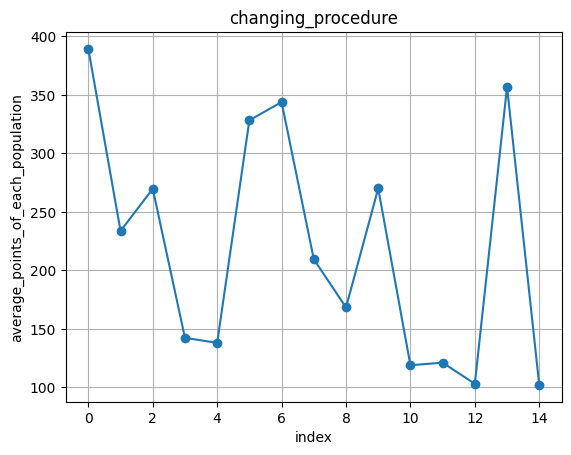

In [27]:
import matplotlib.pyplot as plt
new_points = []
for i in range(0, len(global_points), 20):
  new_points.append(global_points[i])
plt.plot(new_points, marker='o', linestyle='-')
plt.title('changing_procedure')
plt.xlabel('index')
plt.ylabel('average_points_of_each_population')
plt.grid(True)
plt.show()

<p dir=rtl>
در این قسمت روی نمودار نشان داده شده است که بطور کلی میانگین امتیازات رو به کاهش می رود تا به 0 برسد و کل کروموزوم های جمعیت محدودیت های مسئله را ارضا کنند.البته باتوجه به hyperparameter CUTOFF_POINT میتوان میانگین امتیازاتی که باعث خاتمه می شود را تغییر داد.